# **Business Case: Aerofit - Descriptive Statistics & Probability**

About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [158]:
df= pd.read_csv('/content/aerofit_treadmill.csv')

## Initial Analysis

In [159]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [160]:
df.size

1620

In [161]:
df.shape

(180, 9)

* Dataset contains 180 rows and 9 columns

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* Most of the columns are Integer datatype only expect for Product, Gender, MaritalStatus

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [164]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107




### **Non Graphical Analysis**

In [165]:
df['Product'].nunique()

3

In [166]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [167]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [168]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [169]:
df['Age'].nunique()

32

In [170]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [171]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [172]:
df['Gender'].nunique()

2

In [173]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [174]:
df['MaritalStatus'].nunique()

2

In [175]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [176]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Checking for outliers

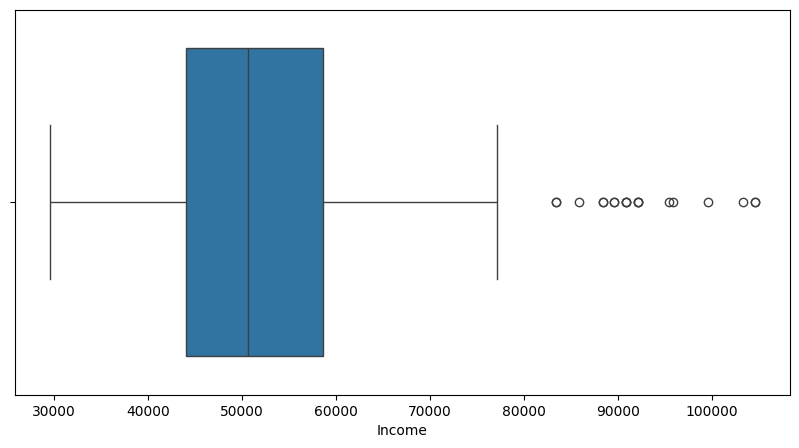

In [177]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Income'])
plt.show()

* Here ouliers are not droped beacuse they contain data .

---



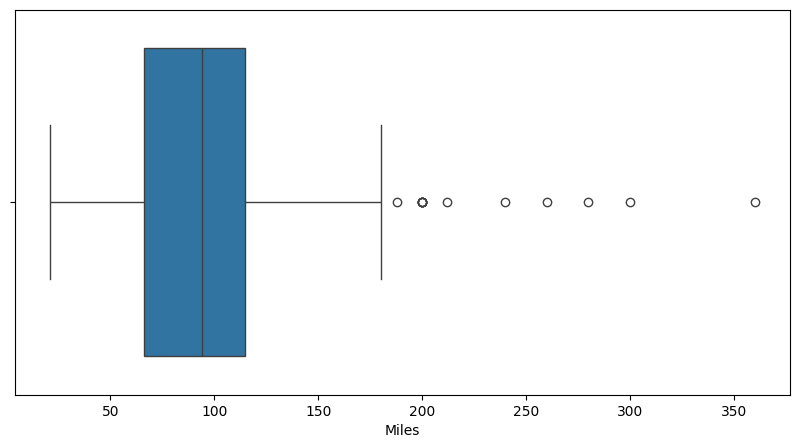

In [178]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Miles'])
plt.show()

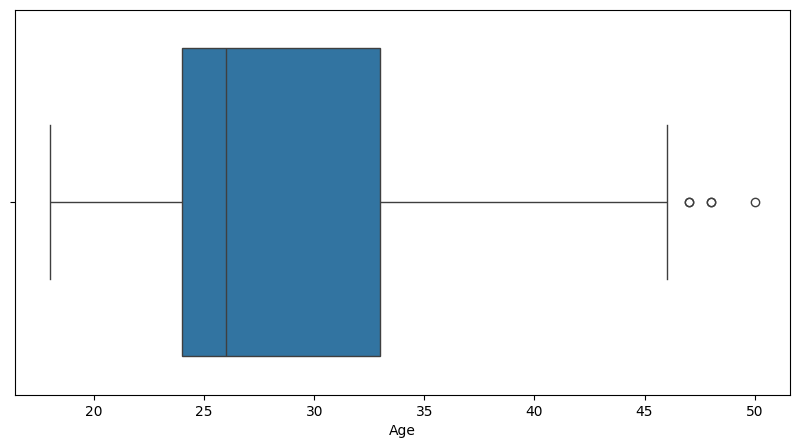

In [179]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])
plt.show()

* Here ouliers are not droped beacuse they contain data .

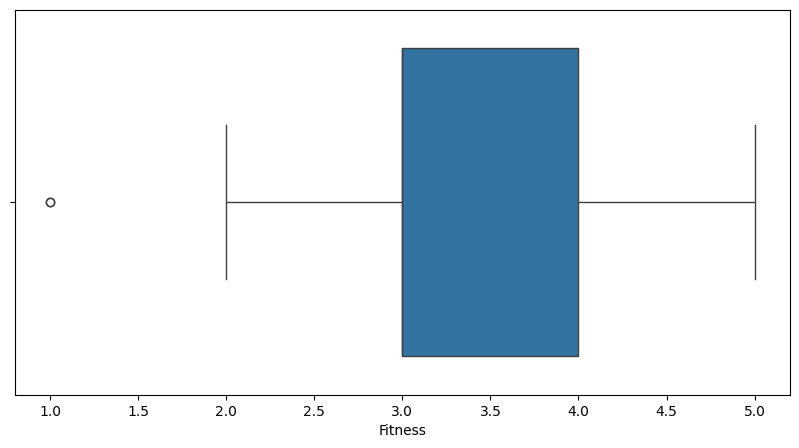

In [180]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fitness'])
plt.show()

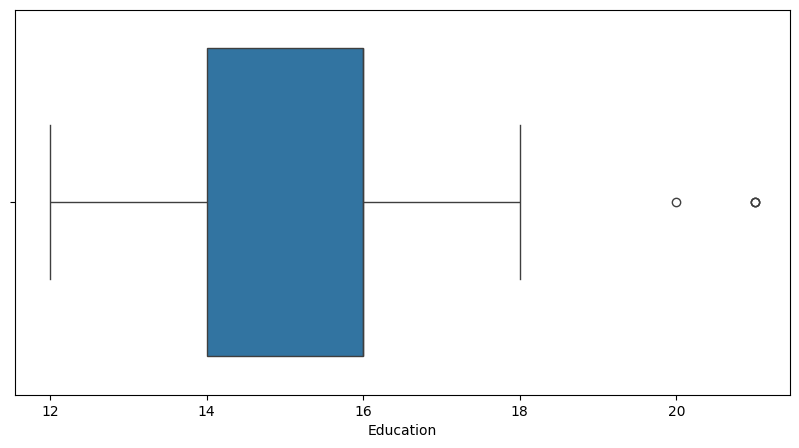

In [181]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Education'])
plt.show()

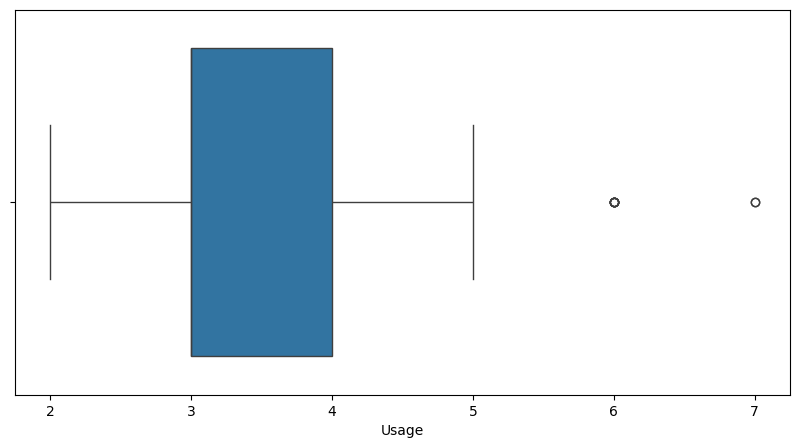

In [182]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Usage'])
plt.show()

### outliers using z scores

In [183]:
z_scores= {}
outliers = {}

for cols in df.select_dtypes(include=['int64']):
  mean= df[cols].mean()
  std= df[cols].std()
  z_scores[cols]= (df[cols]-mean)/std

for column, z_score in z_scores.items():
    outliers[column] = df[abs(z_score) > 3]

for column, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"{column}:")
        print(outlier_df)

Age:
   Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
79   KP281   50  Female         16     Partnered      3        3   64809   

    Miles  
79     66  
Education:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
157   KP781   26  Female         21        Single      4        3   69721   
161   KP781   27    Male         21     Partnered      4        4   90886   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
157    100  
161    100  
175    200  
Usage:
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
163   KP781   28   Male         18     Partnered      7        5   77191   
166   KP781   29   Male         14     Partnered      7        5   85906   

     Miles  
163    180  
166    300  
Income:
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
168   KP781   30   Male         18     Partnered      5        4  103336   
174   KP781

### **Univariate Analysis**

In [184]:
np.round(df['Product'].value_counts(normalize=True)*100,2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

 - **44.44%** of customers bought **KP281** product type
 - **33.33%** of customers bought **KP481** product type
 - **22.22%** of customers bought **KP781** product type






<Axes: xlabel='Product', ylabel='count'>

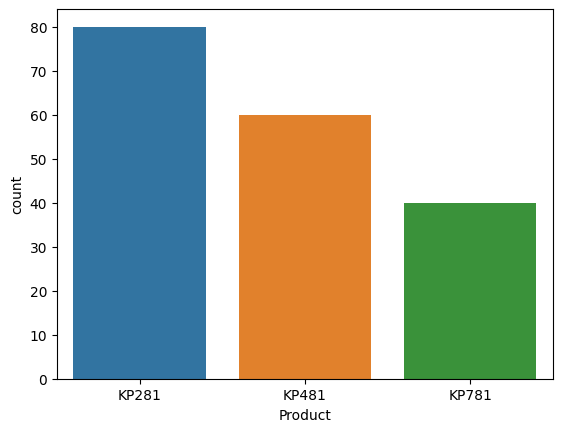

In [185]:
sns.countplot(x=df['Product'],hue=df['Product'])

In [186]:
np.round(df['Gender'].value_counts(normalize=True)*100,2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

 - **57.78%** of customers are **Male**
 - **42.22%** of customers are **Female**

<Axes: xlabel='Gender', ylabel='count'>

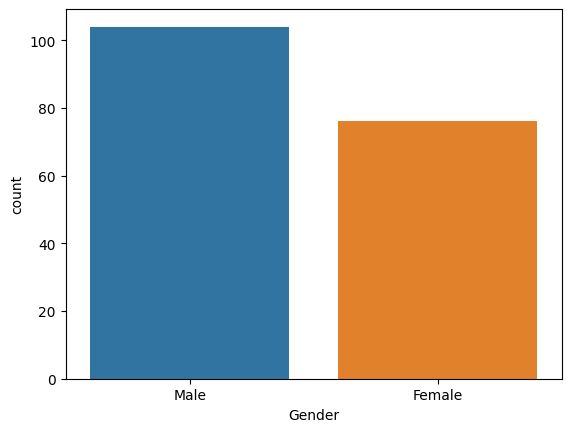

In [187]:
sns.countplot(x=df['Gender'],hue=df['Gender'])

In [188]:
np.round(df['MaritalStatus'].value_counts(normalize=True)*100,2)

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

 - **59.44%** of customers are **Married/Partnered**
 - **40.56%** of customers are **Single**

<Axes: xlabel='MaritalStatus', ylabel='count'>

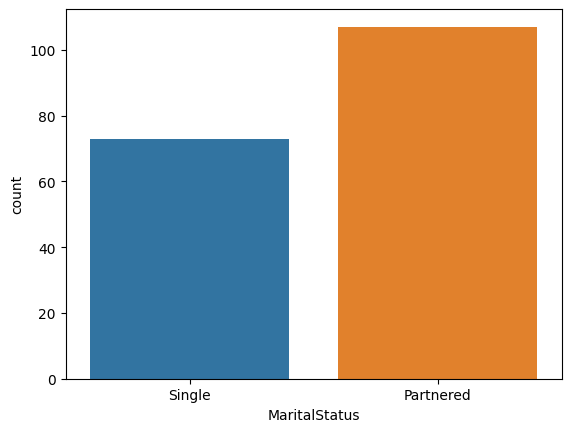

In [189]:
sns.countplot(x=df['MaritalStatus'],hue=df['MaritalStatus'])

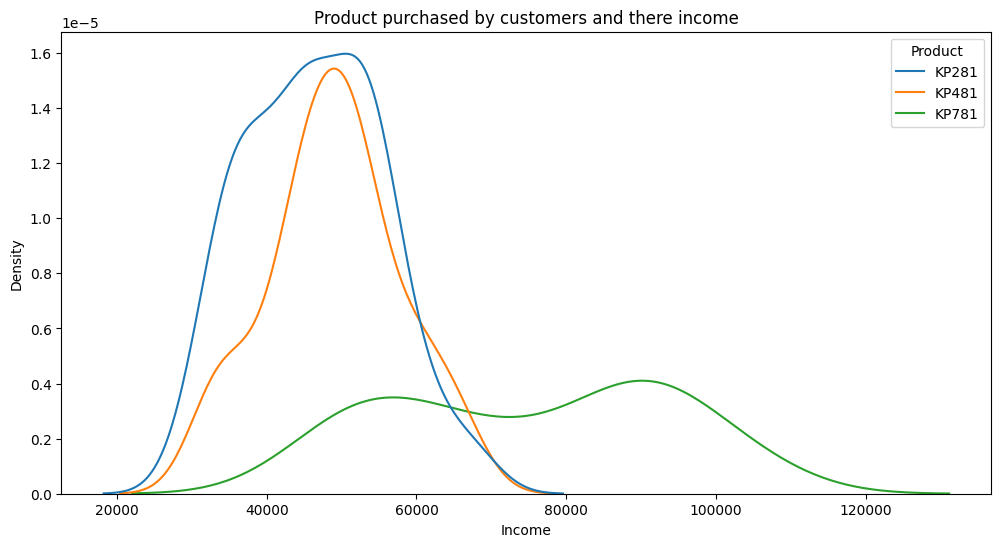

In [190]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Income'],hue=df['Product'])
plt.title('Product purchased by customers and there income')
plt.show()

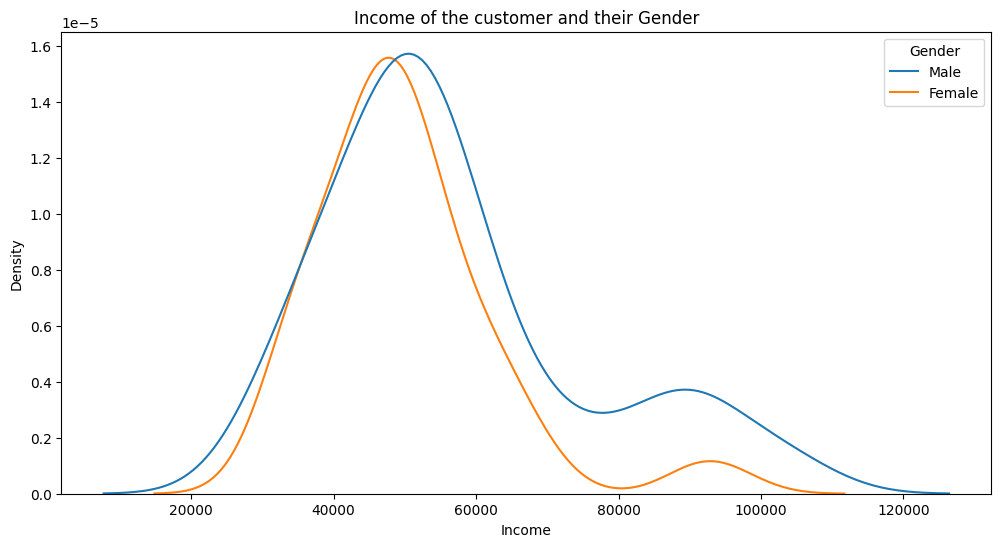

In [191]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Income'],hue=df['Gender'])
plt.title('Income of the customer and their Gender')
plt.show()

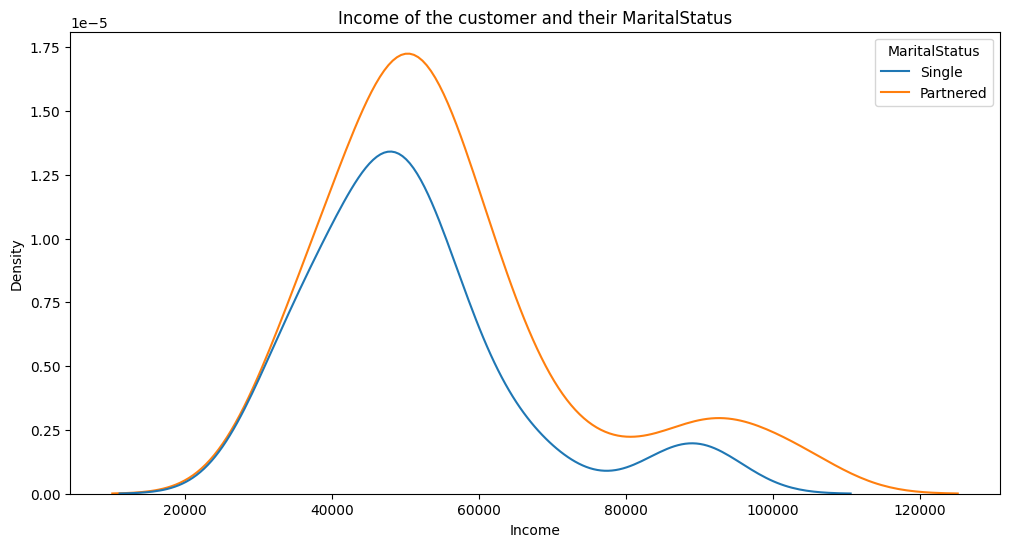

In [192]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Income'],hue=df['MaritalStatus'])
plt.title('Income of the customer and their MaritalStatus')
plt.show()

In [193]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


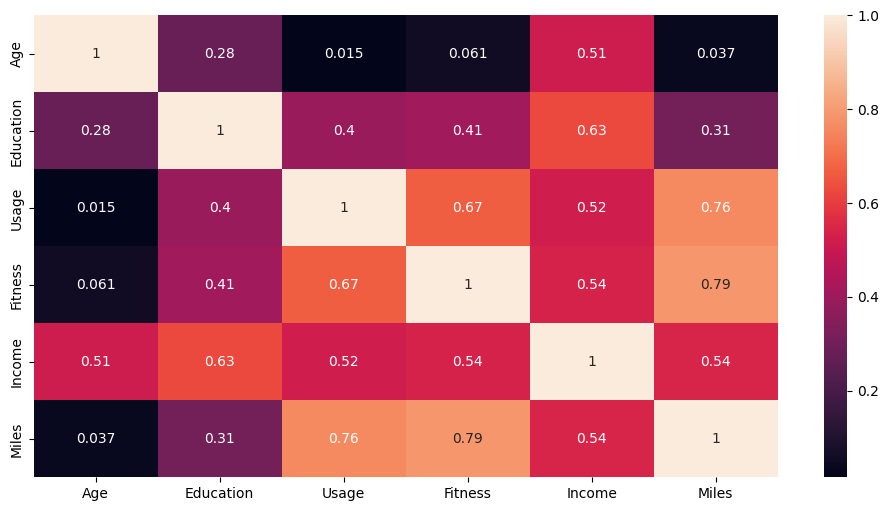

In [194]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [195]:
def fit(x):
  if x== 5:
    return 'Excellent Shape'
  elif x==4:
    return 'Good Shape'
  elif x==3:
    return 'Average Shape'
  elif x==2:
    return 'Bad Shape'
  else:
    return 'Poor Shape'

df['Level_of_fitness']= df['Fitness'].apply(fit)


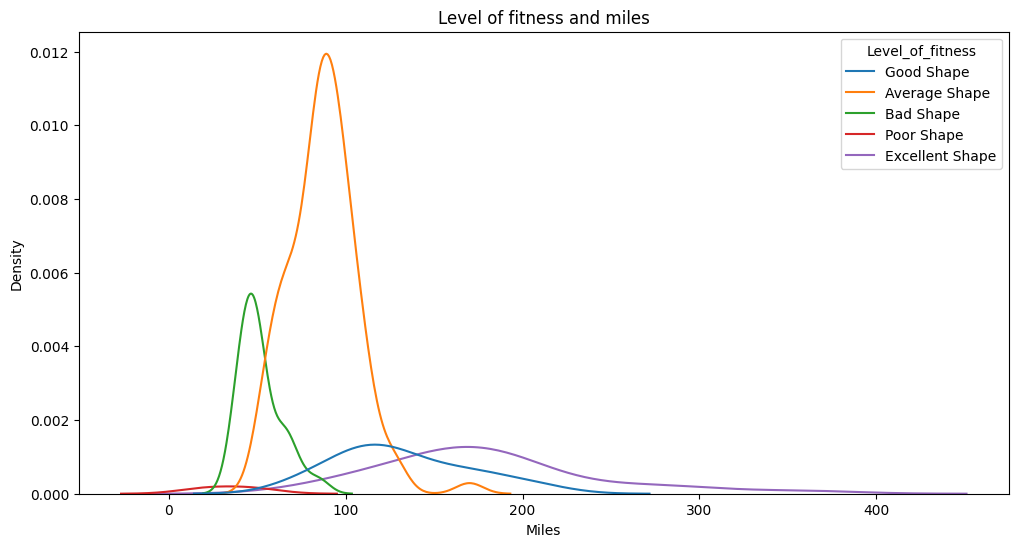

In [196]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Miles'],hue=df['Level_of_fitness'])
plt.title('Level of fitness and miles')
plt.show()

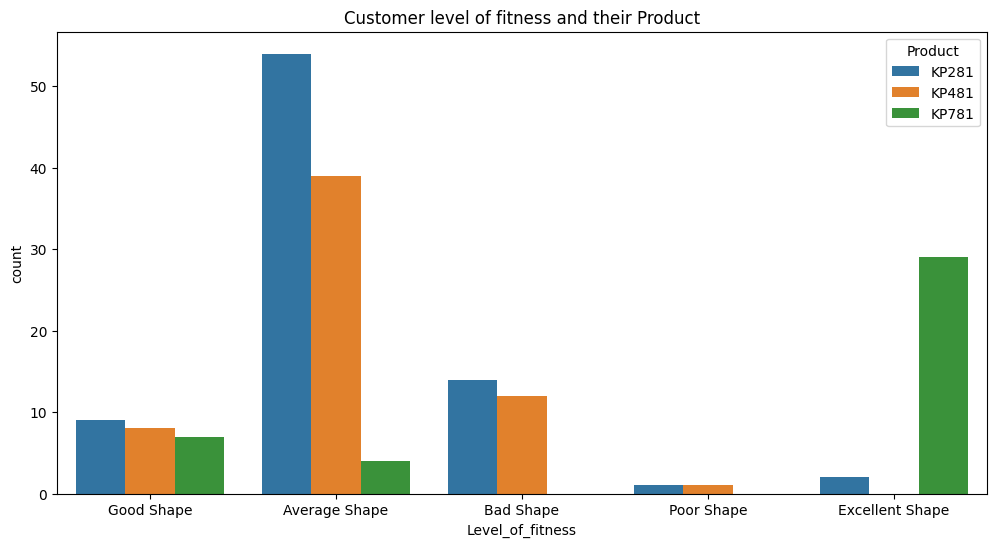

In [197]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Level_of_fitness'],hue=df['Product'])
plt.title('Customer level of fitness and their Product')
plt.show()

In [198]:
def age_fun(x):
  if x<28:
    return 'Young'
  elif (x>=28) & (x<=40):
    return 'Middle Aged'
  else:
    return 'Old'

df['Age_Group']= df['Age'].apply(age_fun)

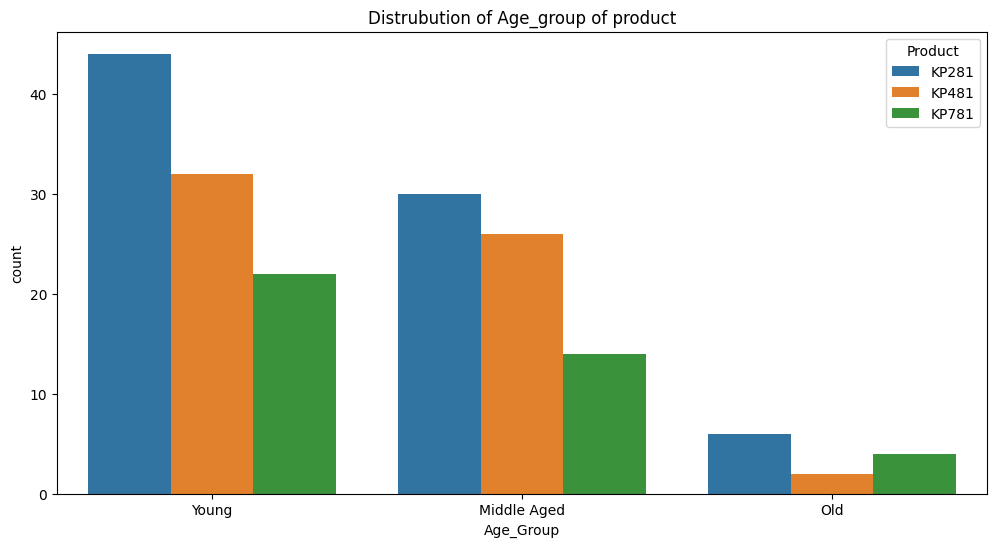

In [199]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Age_Group'],hue=df['Product'])
plt.title('Distrubution of Age_group of product')
plt.show()


In [200]:
def income_group(x):
  if x>=75000:
    return 'High'
  elif (x>45000) & (x<75000):
    return 'Middle'
  elif x<=45000:
    return 'Lower'

df['Level_of_Income'] = df['Income'].apply(income_group)

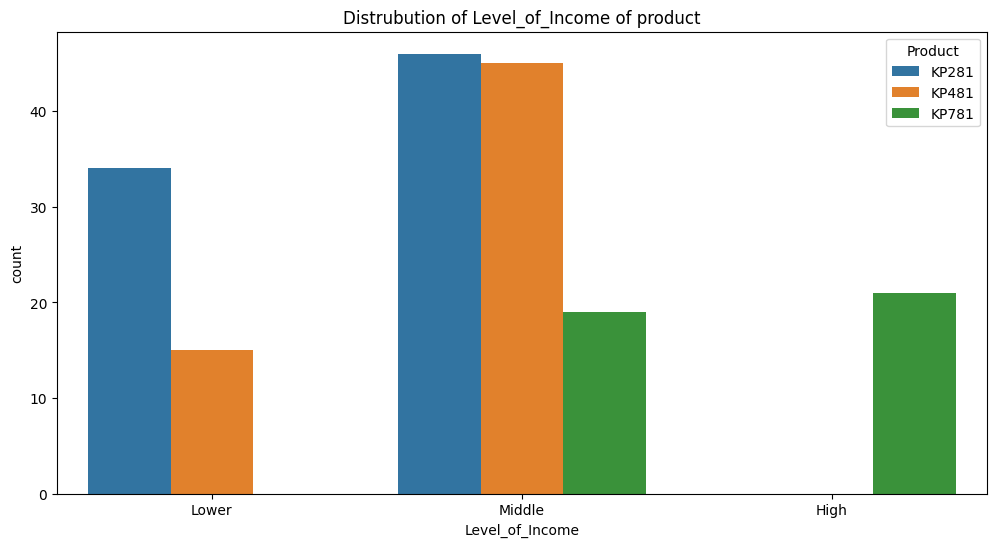

In [201]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Level_of_Income'],hue=df['Product'])
plt.title('Distrubution of Level_of_Income of product')
plt.show()


### **Insights:**

 1. The distrubution here shows the Young aged group that is age less than 28 most popular threadmill is KP281 .
 2. In the Middle Aged group (Age between 28 and 40) there is a slightly difference in usage of KP281 and KP481 but still KP281 threadmill stands top priority for Middle age group also.
 3. Among the old aged (Age above 40) group there is no much significant buys in any type of threadmill but here KP781 comes in picture with KP281.

In [202]:
df['Marital_Gender'] = df['MaritalStatus']+ '-' + df['Gender']

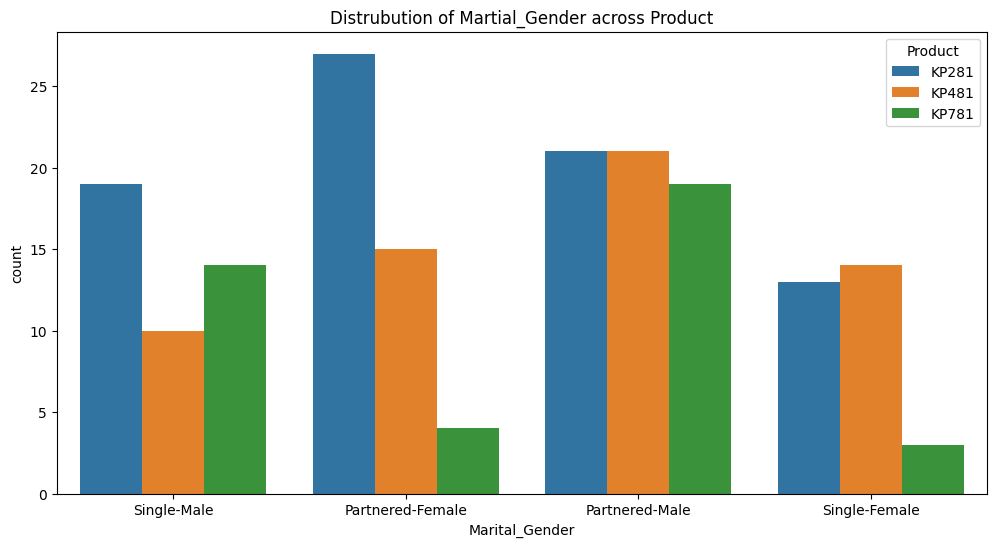

In [203]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Marital_Gender'],hue=df['Product'])
plt.title('Distrubution of Martial_Gender across Product')
plt.show()

###*** Insights***

1. By the distubution we can understand that threadmill KP281 is more preffred by the single-male.
2. And we can see that fro singel female KP781 is least preffered and almost KP281 and KP481 is prefered more.
3. In Parterned male there is almost equal preference for both KP281 and KP481.
4. There is significant amount of patnered-female prefering KP281.

### **Bi variate Analysis**

In [204]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

* Average Age of customer using threadmill KP281 is 28.55
* Average Age of customer using threadmill KP481 is 28.90
* Average Age of customer using threadmill KP781 is 29.10

In [205]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

* Average fitness of user using KP281 is 2.96
* Average fitness of user using KP481 is 2.90
* Average fitness of user using KP781 is 4.62

In [206]:
d1=pd.DataFrame(df.groupby(['Gender','Level_of_fitness']).size())
d1.rename(columns={0:'Count'},inplace=True)
d1

Count
Gender Level_of_fitness       
Female Average Shape        45
       Bad Shape            16
       Excellent Shape       6
       Good Shape            8
       Poor Shape            1
Male   Average Shape        52
       Bad Shape            10
       Excellent Shape      25
       Good Shape           16
       Poor Shape            1

* In Females we can observe that most them are average shaped.while in Males 52 of them are average shape and 25 are in excellent shape.


In [207]:
d2= pd.DataFrame(df.groupby(['Marital_Gender','Level_of_fitness']).size())
d2.rename(columns={0:'Count'},inplace=True)
d2

Count
Marital_Gender   Level_of_fitness       
Partnered-Female Average Shape        30
                 Bad Shape             9
                 Excellent Shape       5
                 Good Shape            2
Partnered-Male   Average Shape        27
                 Bad Shape             9
                 Excellent Shape      13
                 Good Shape           11
                 Poor Shape            1
Single-Female    Average Shape        15
                 Bad Shape             7
                 Excellent Shape       1
                 Good Shape            6
                 Poor Shape            1
Single-Male      Average Shape        25
                 Bad Shape             1
                 Excellent Shape      12
                 Good Shape            5

In [208]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Level_of_fitness,Age_Group,Level_of_Income,Marital_Gender
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Young,Lower,Single-Male
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Young,Lower,Single-Male
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Young,Lower,Partnered-Female
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Young,Lower,Single-Male
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Young,Lower,Partnered-Male


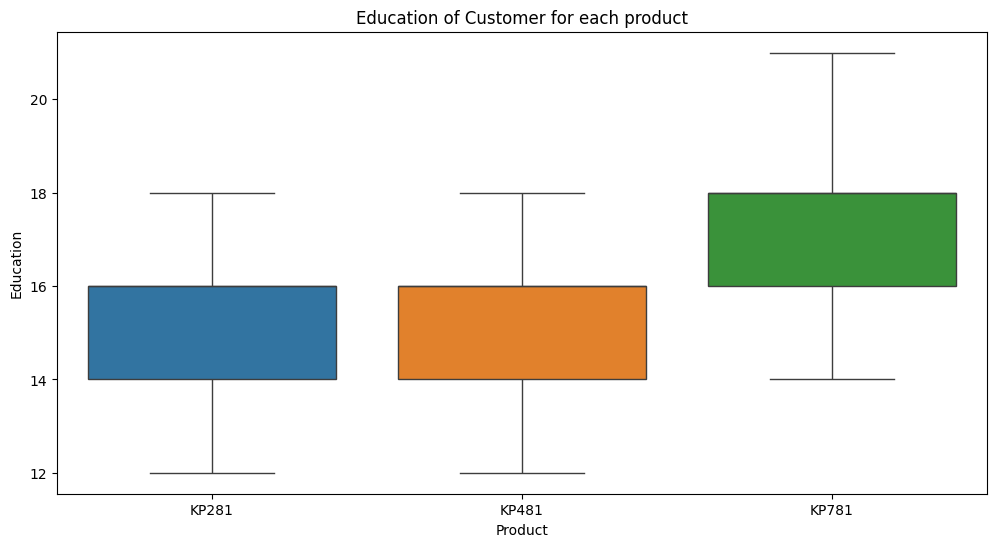

In [209]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Product'],y=df['Education'],hue=df['Product'])
plt.title('Education of Customer for each product')
plt.show()

 ### **Insights**

 * Customers with Higher education of 16 to 18 have preferred mostly product type KP781
 * Customers with education between 14 to 16 prefer KP281 and KP481 equally

---



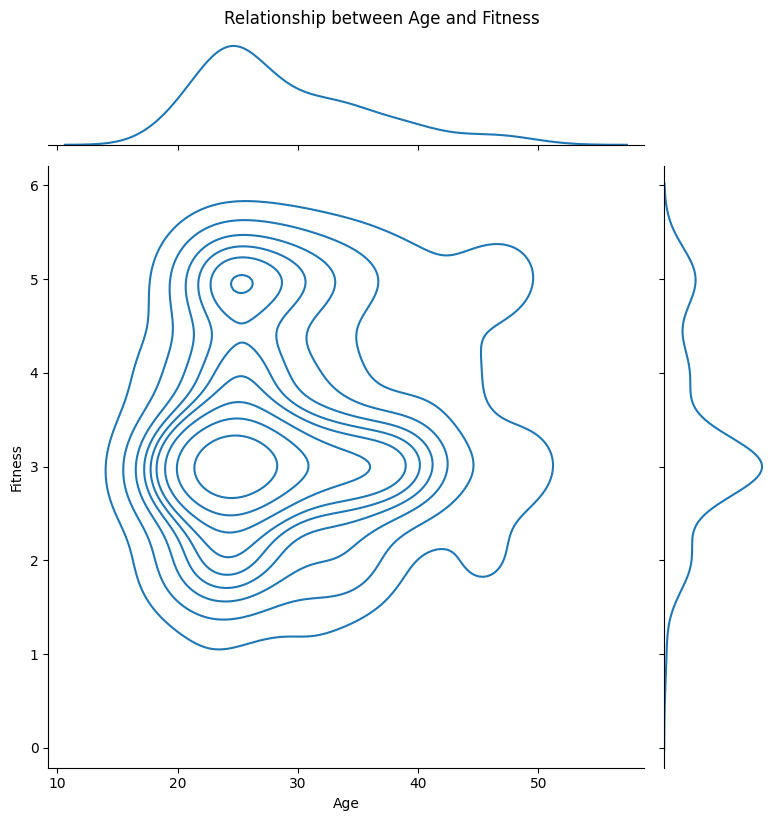

In [210]:
sns.jointplot(data=df, x='Age', y='Fitness', kind='kde', height=8)
plt.suptitle('Relationship between Age and Fitness', y=1.02)
plt.show()

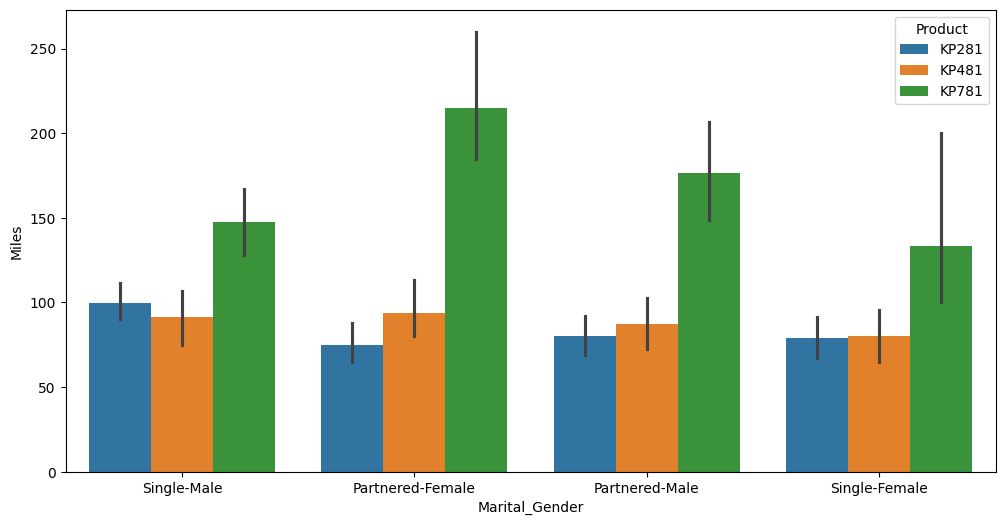

In [211]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Marital_Gender'],y=df['Miles'],hue=df['Product'])
plt.show()

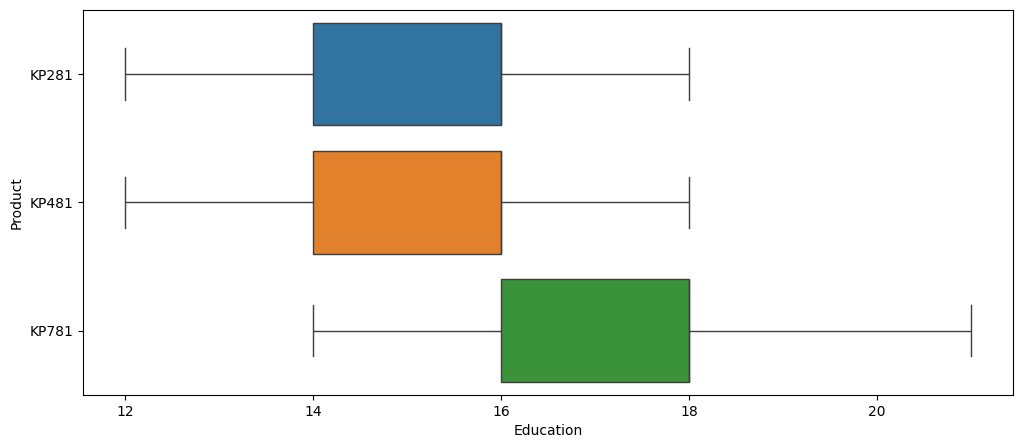

In [212]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df,hue='Product')
plt.show()

- Product type KP781 has been favoured mostly by customers with higher education, aged 16 to 18.
-Customers aged 14 to 16 years old favour KP281 and KP481 equally.

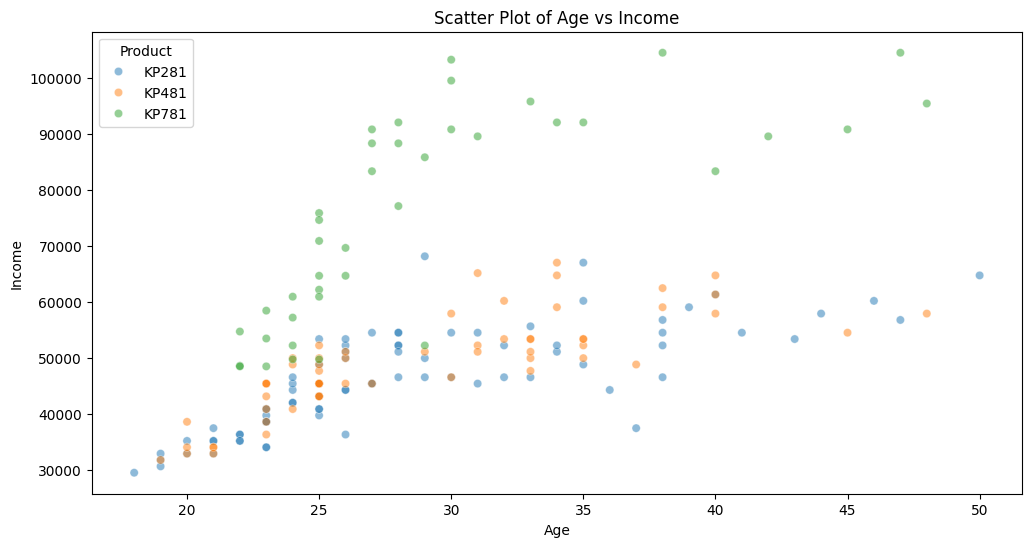

In [213]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['Income'],hue=df['Product'] ,alpha=0.5)
plt.title('Scatter Plot of Age vs Income')
plt.show()

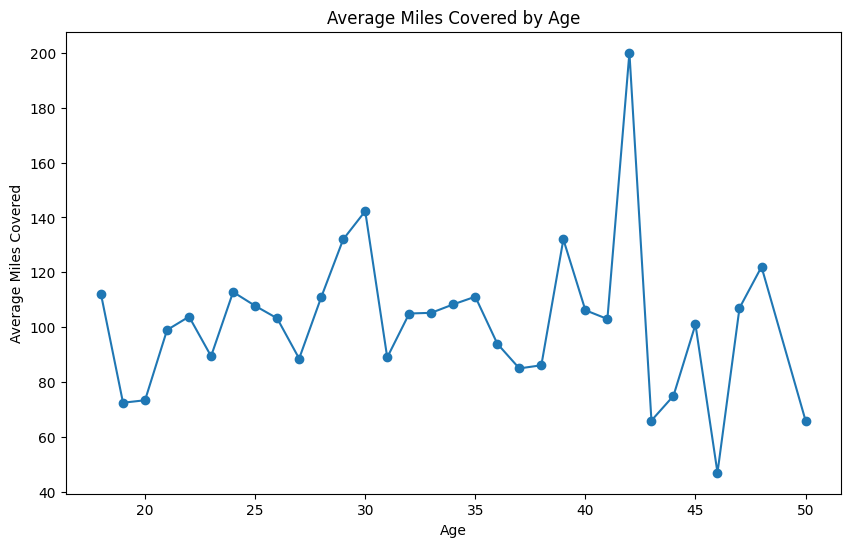

In [214]:
avg_miles_by_age = df.groupby('Age')['Miles'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_miles_by_age.index, avg_miles_by_age.values, marker='o', linestyle='-')
plt.title('Average Miles Covered by Age')
plt.xlabel('Age')
plt.ylabel('Average Miles Covered')
plt.show()

<Figure size 1200x600 with 0 Axes>

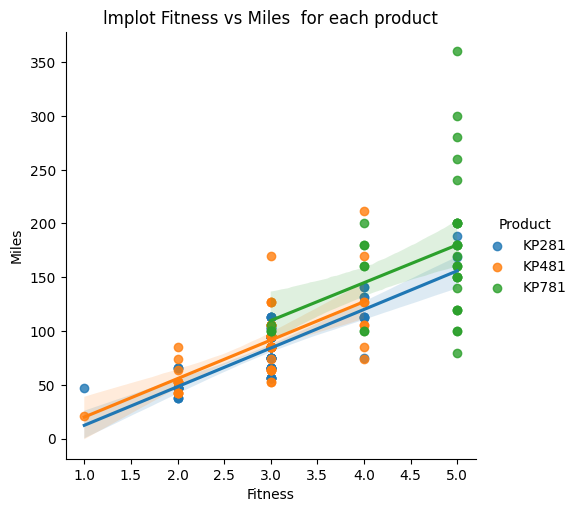

In [215]:
plt.figure(figsize=(12,6))
sns.lmplot(data=df,x='Fitness',y='Miles',hue='Product')
plt.title('lmplot Fitness vs Miles  for each product')
plt.show()

* We can see a postive correlation between fitness and miles for each product.


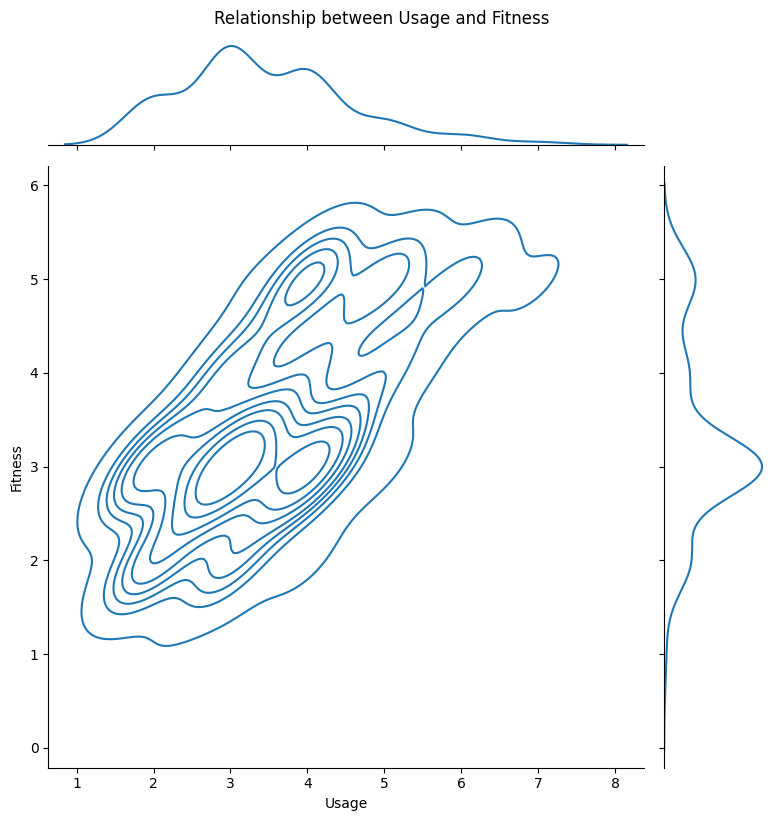

In [216]:
sns.jointplot(data=df, x='Usage', y='Fitness', kind='kde', height=8)
plt.suptitle('Relationship between Usage and Fitness', y=1.02)
plt.show()

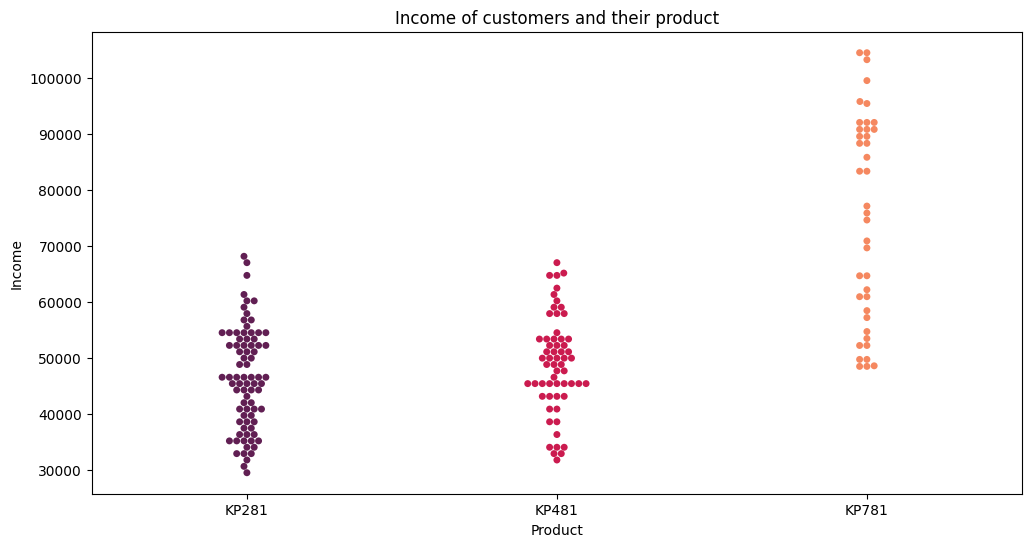

In [217]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='Product', y='Income', palette='rocket')
plt.title('Income of customers and their product')
plt.show()

## **Effect of Gender on the Threadmill Sales**


In [218]:
pd.crosstab(df['Product'],df['Gender'],margins=True,margins_name='Total',normalize=True).round(3)


Gender,Female,Male,Total
Product,,,
KP281,0.222,0.222,0.444
KP481,0.161,0.172,0.333
KP781,0.039,0.183,0.222
Total,0.422,0.578,1.000


### Marginal Probabilty

 * P(Female) = 0.422
 * P(Male) = 0.578
 * P(KP281) = 0.444
 * P(KP481) = 0.333
 * P(KP781) = 0.222

### Conditional Probabilty
* For KP281:

   * P(Female |KP281) = 0.222
   * P(Male |KP281) = 0.222

* For KP481:

   * P(Female |KP481) = 0.161
   * P(Male |KP481) = 0.172


* For KP781:

   * P(Female |KP781) = 0.039
   * P(Male |KP781) = 0.183


## **Effect of Fitness Level on Threadmill Sales**


In [219]:
pd.crosstab(index=df['Level_of_fitness'],columns=df['Product'],normalize='columns',margins=True).T.round(3)

Level_of_fitness,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,0.675,0.175,0.025,0.112,0.012
KP481,0.650,0.200,0.000,0.133,0.017
KP781,0.100,0.000,0.725,0.175,0.000
All,0.539,0.144,0.172,0.133,0.011


### Marginal Probabilty

 * P(Good Shape) = 0.133
 * P(Excellent Shape) = 0.172
 * P(Bad Shape) = 0.144
 * P(Average Shape) = 0.538

### Conditional Probabilty
* For KP281:

   * P(Good Shape |KP281) = 0.112
   * P(Excellent Shape |KP281) = 0.025
   * P(Bad Shape |KP281) = 0.175
   * P(Average Shape |KP281) = 0.675
   * P(PoorShape |KP281) = 0.012

* For KP481:

   * P(Good Shape |KP481) = 0.133
   * P(Excellent Shape |KP481) = 0.000
   * P(Bad Shape |KP481) = 0.200
   * P(Average Shape |KP481) = 0.650
   * P(PoorShape |KP481) = 0.016

* For KP781:

   * P(Good Shape |KP781) = 0.175
   * P(Excellent Shape |KP781) = 0.725
   * P(Bad Shaper |KP781) = 0.000
   * P(Average Shape |KP781) = 0.100
   * P(PoorShape |KP781) = 0.000

## **Effect of Income Level on Threadmill Sales**

In [220]:
pd.crosstab(index=df['Product'],columns=df['Level_of_Income'],normalize='index',margins=True,margins_name='Total').round(3)

Level_of_Income,High,Lower,Middle
Product,,,
KP281,0.000,0.425,0.575
KP481,0.000,0.250,0.750
KP781,0.525,0.000,0.475
Total,0.117,0.272,0.611


### Marginal Probabilty

 * P(High) = 0.116
 * P(Lower) = 0.272
 * P(Middle) = 0.611


### Conditional Probabilty
* For KP281:

   * P(High |KP281) = 0.000
   * P(Lower |KP281) = 0.425
   * P(Middle |KP281) = 0.575

* For KP481:

   * P(High |KP481) = 0.000
   * P(Lower |KP481) = 0.250
   * P(Middle |KP481) = 0.750

* For KP781:

   * P(High |KP781) = 0.525
   * P(Lower |KP781) = 0.000
   * P(Middle |KP781) = 0.475

## **Effect of Age Group on Threadmill Sales**

In [221]:
pd.crosstab(index=df['Product'],columns=df['Age_Group'],margins=True,margins_name='Total',normalize='index').round(3)

Age_Group,Middle Aged,Old,Young
Product,,,
KP281,0.375,0.075,0.550
KP481,0.433,0.033,0.533
KP781,0.350,0.100,0.550
Total,0.389,0.067,0.544


### Marginal Probabilty

 * P(Middle Aged) = 0.389
 * P(Old) = 0.067
 * P(Young) = 0.544


### Conditional Probabilty
* For KP281:

   * P(Middle Aged |KP281) = 0.375
   * P(Old |KP281) = 0.0.75
   * P(Young |KP281) = 0.550

* For KP481:

   * P(Middle Aged |KP481) = 0.433
   * P(Old |KP481) = 0.033
   * P(Young |KP481) = 0.533

* For KP781:

   * P(Middle Aged |KP781) = 0.350
   * P(Old |KP781) = 0.100
   * P(Young |KP781) = 0.550

## **Effect of Treadmill Usage on Sales of Treadmills**

In [222]:
pd.crosstab(index=df['Product'],columns=df['Usage'],margins=True,margins_name='Total',normalize='index').round(3)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.238,0.462,0.275,0.025,0.000,0.000
KP481,0.233,0.517,0.200,0.050,0.000,0.000
KP781,0.000,0.025,0.450,0.300,0.175,0.050
Total,0.183,0.383,0.289,0.094,0.039,0.011


* P(Usage of KP281 > 5 days)=P(Usage on day 6)+P(Usage on day 7) = 0+0 = 0
* P(Usage of KP481 > 5 days)=P(Usage on day 6)+P(Usage on day 7) = 0+0 = 0
* P(Usage of KP781 > 5 days)=P(Usage on day 6)+P(Usage on day 7) = 0.175+0.05 = 0.225

* Probability of usage of KP281 for atleast 2 days : 0.462+0.275+0.025+0.000+0.000+0.000= 0.762
* Probability of usage of KP481 for atleast 2 days : 0.517+0.200+0.050+0.000+0.000+0.000=0.767
* Probability of usage of KP781 for atleast 2 days : 0.025+0.450+0.300+0.175+0.050= 1.000

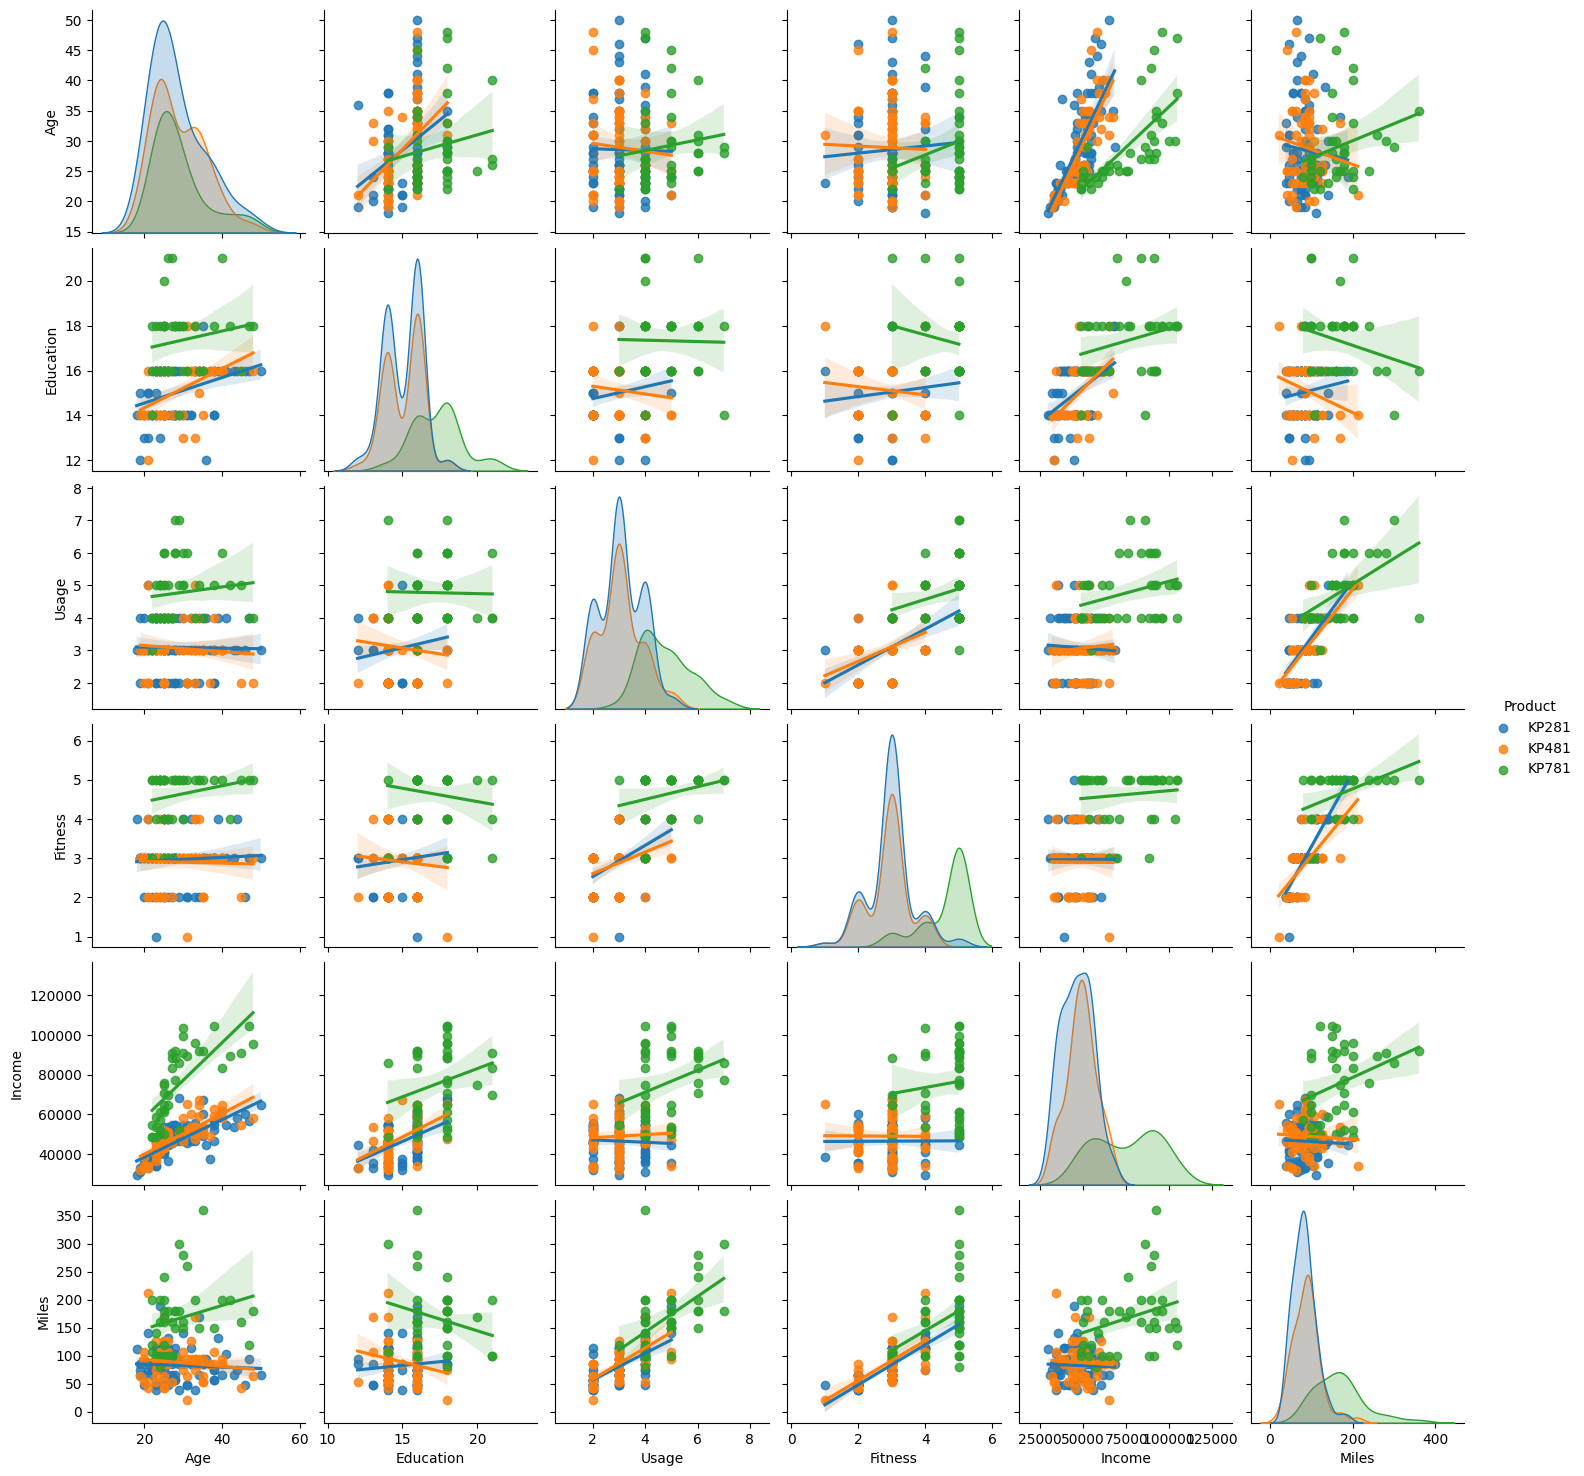

In [223]:
# Creating the pairplot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

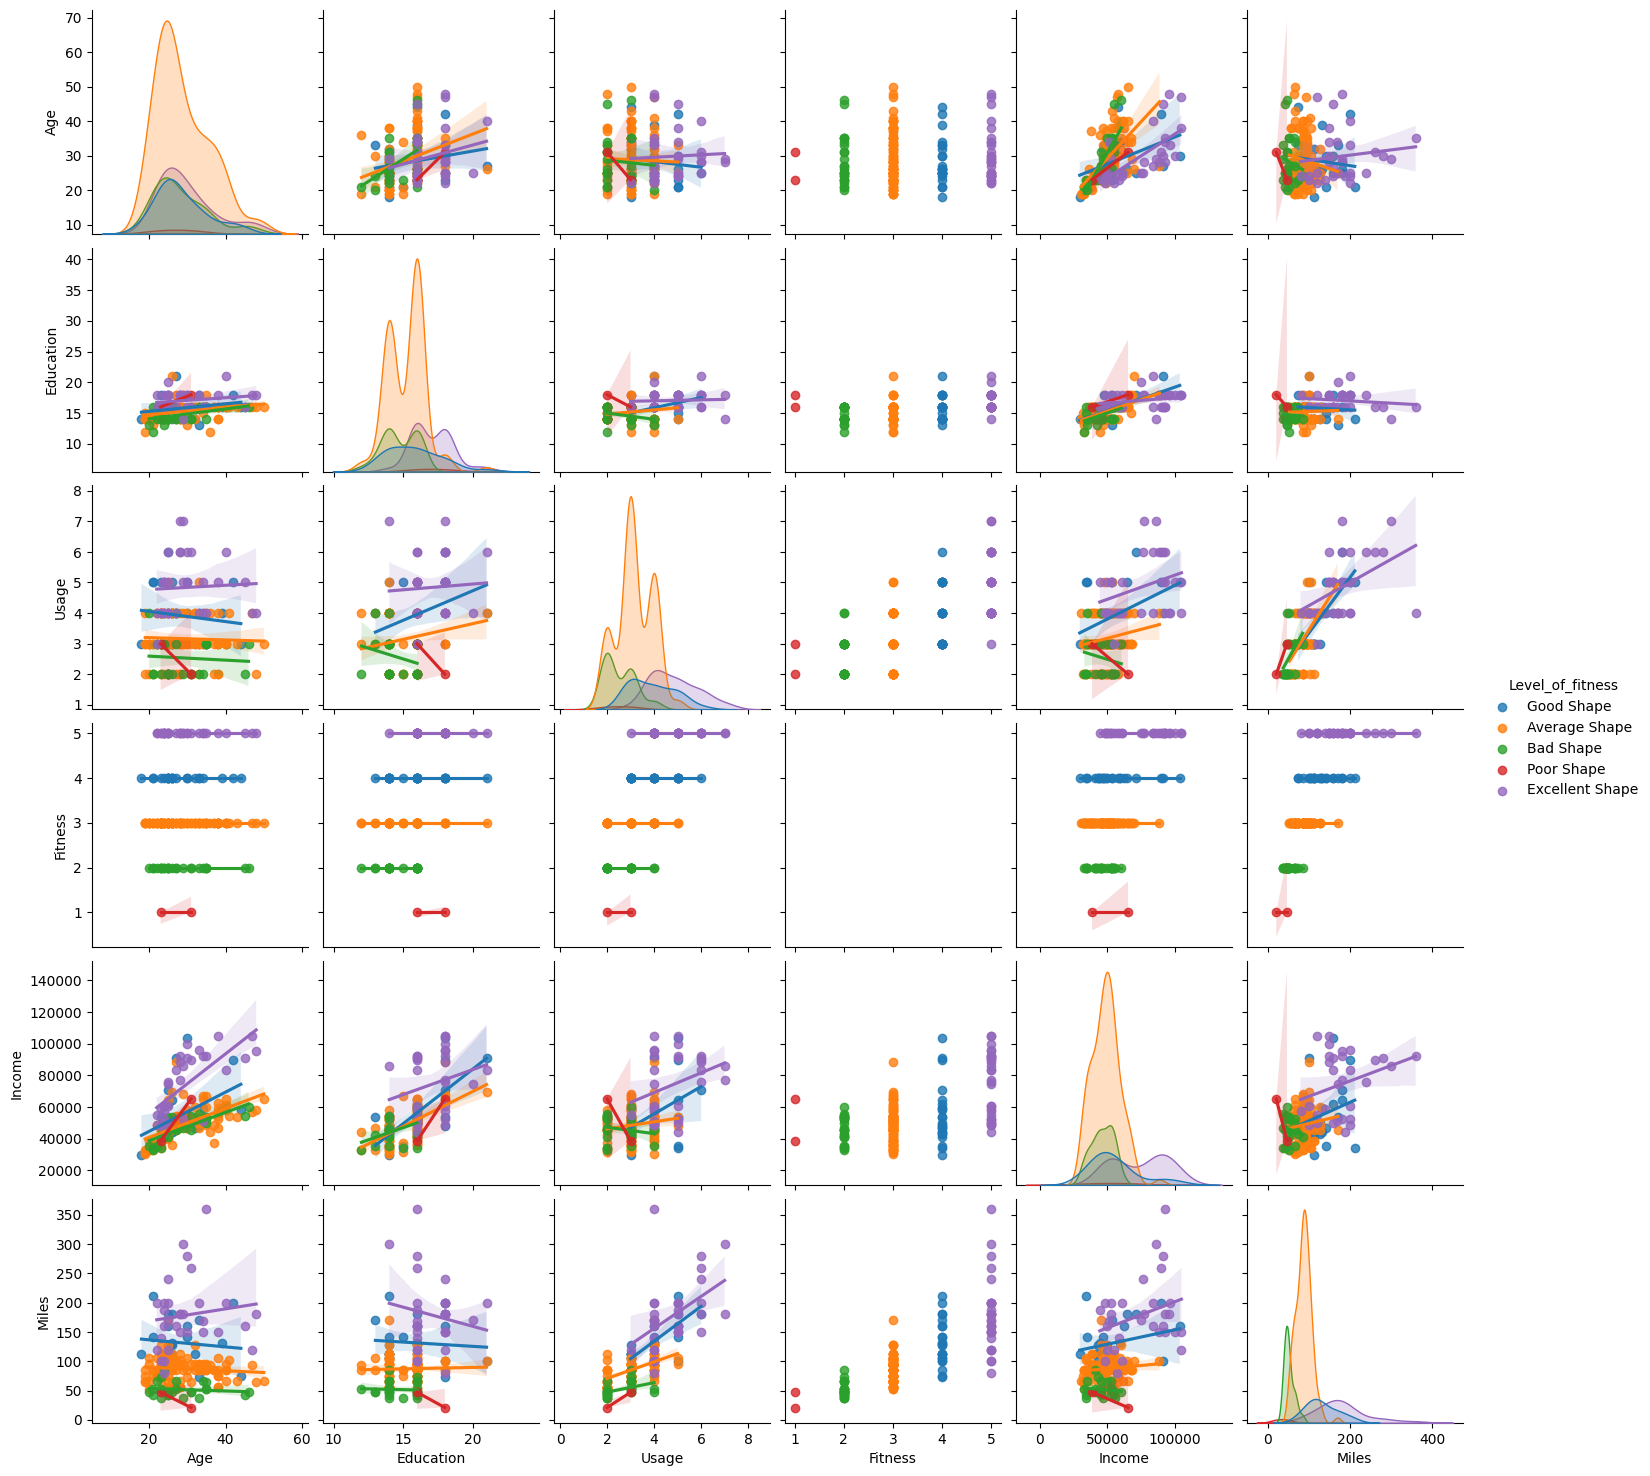

In [224]:
sns.pairplot(df,hue='Level_of_fitness',kind='reg')

plt.show()

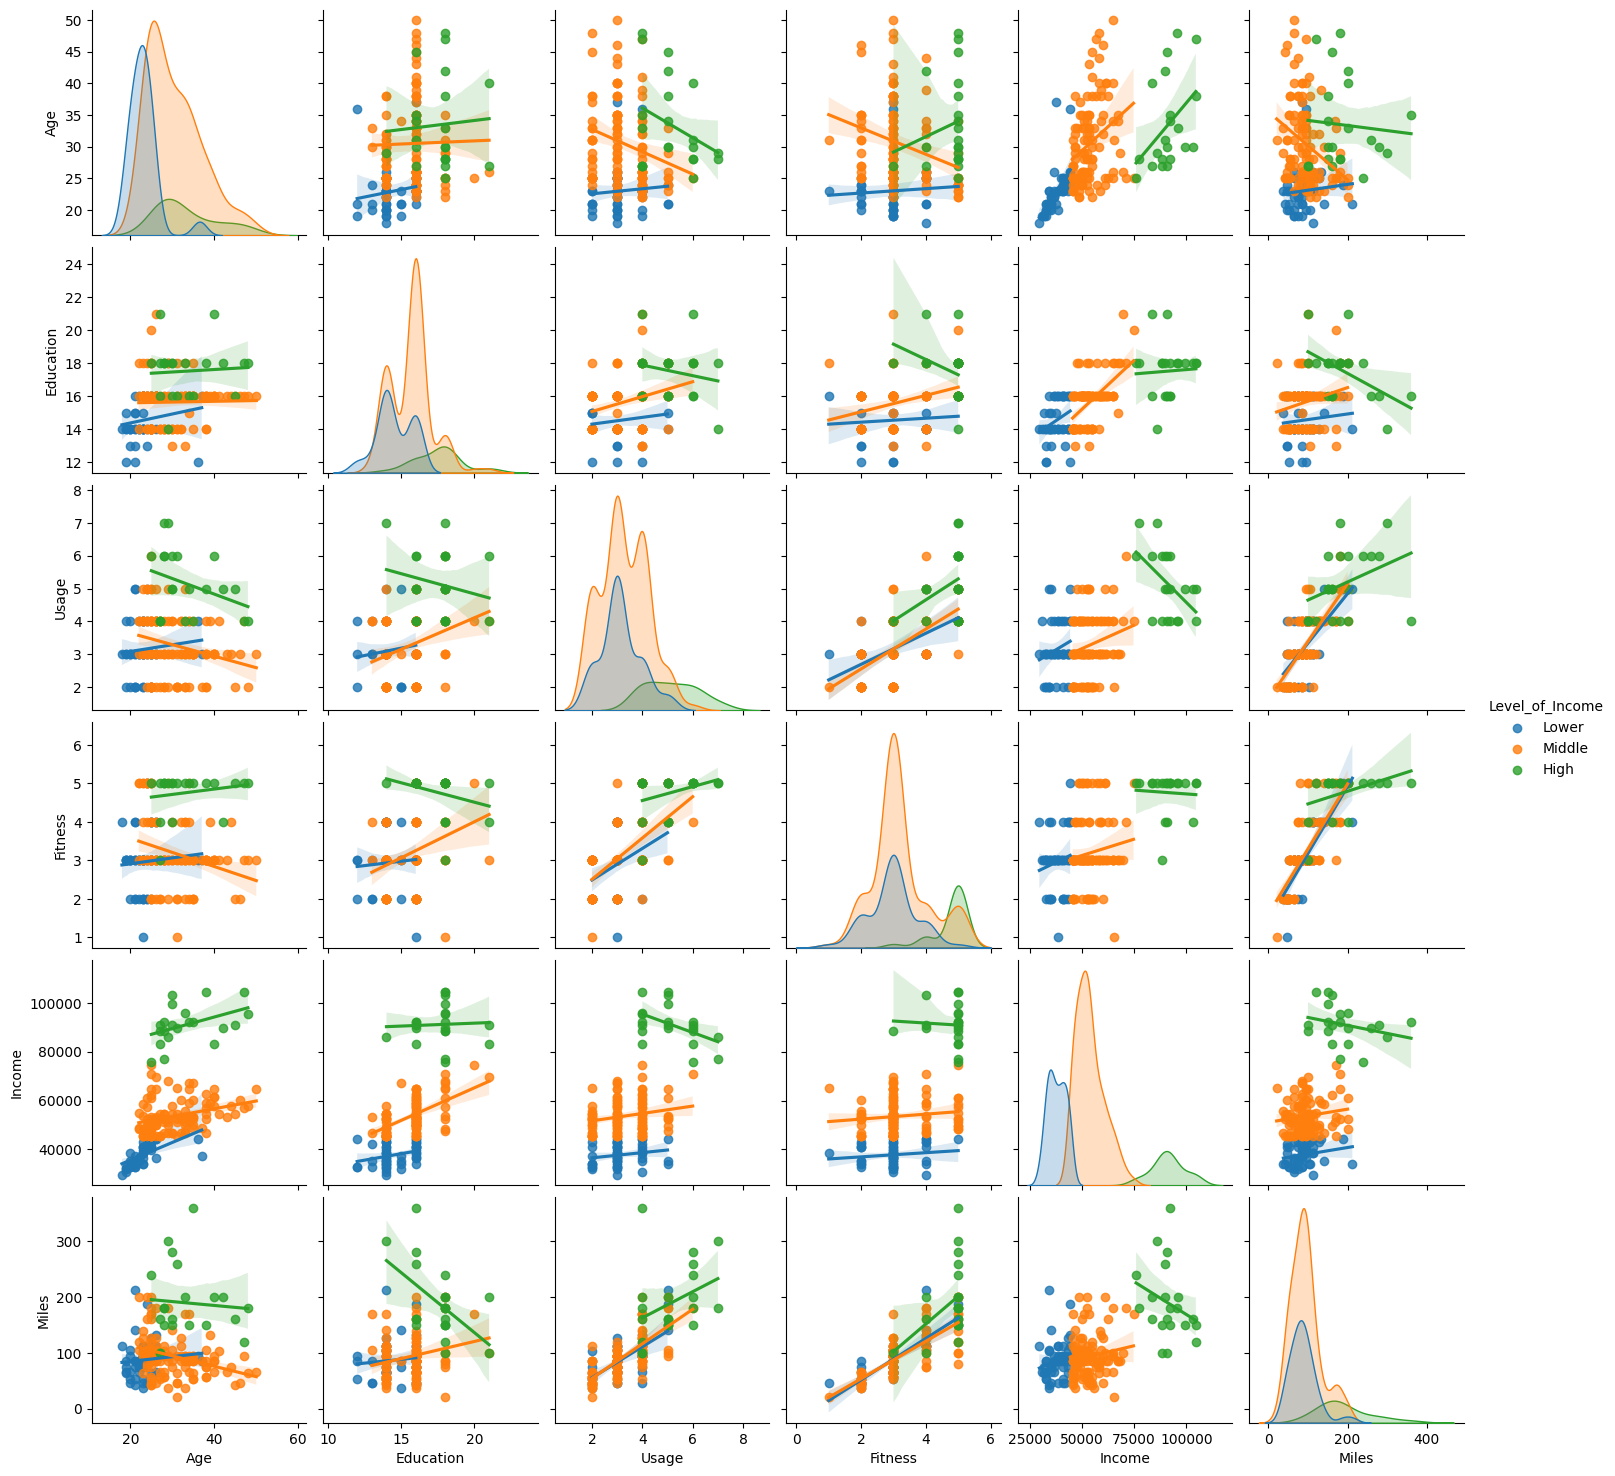

In [156]:
sns.pairplot(df,hue='Level_of_Income',kind='reg')

plt.show()

## **Customer Profiling**

* **For KP281**

  - KP281 is the product that is most affordable for all kinds of customers.
  - Both genders prefer it.
  - It can be selected by any kind of married gender, including single men, single women, partnered men, and partnered women.
  - All age groups of clients, particularly the younger and middle-aged ones, prefer this product.
  - Customers who are 16 to 18 years old have a preference for this product.
  About three or four times a week, this product is utilized.
  - This product can go between 70 and 80 miles on average.
 - Customers with middle-class incomes are more likely to favor this product.
 - Given that it is an entry-level product.
  - Customers who bought the product gave the fitness grade of "Average shape."

* **For KP481**

  - KP481 is the second most popular product for the customers.
  - partnered-male prefers this product, single-male are the ones who prefer it least.
  - young age group prefer more when compared to other age groups, old age group are least ones who prefer this.
  - customers who have education between 14 to 16 prefer this.
  - Average Income of the customer who buys KP481 is 49K.
  - Average Usage of this product is 3 days per week.
  - The age range of KP481 treadmill customers is roughly between 24-34 years.
  - Depending upon the usage of this product the fitness level rating varies from bad shape to average shape.
  - The probabilty ofcustomer having excellent shape is 0.

* **For KP781**

 - This product ismore advanced and high cost.
 - customers whose level of income is high are more likely to prefer this product.
 - customers who maintains excellent shape of fitness prefer this product.
 - probabilty of customers who belongs to lower level income and chossing this product is 0.
 - probabilty of customers using KP781 in a week is higher when compared to others.
 - Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

## **Insights**

  
1. Among the users 44.44 % prefer using KP281,while 33.33% of the people will
go for KP481 and 22.22% of the users prefer KP781.
2. KP281 stands top among other threadmills because of its afforadable price by any income group.
3. On the other hand due to it high price KP781 is least prefered among the users.
4. There are 57% of males customers and 42% of female customers.
5. around 22 %  of male and female prefer KP281 due to its low cost and less maintainenece.
6. Among male and female customers 9 % of them prefer KP781 due to it high cost.
7. probabilty of getting execellent shape while using KP481 is 0 .
8. probabilty of getting bad shape and poor shape  in KP781 is 0 .hence customers who use KP781 are in good shape.
9. probabilty of chossing KP281 and KP481 for high income people is 0.
10. Married customers have high chances of purchasing all types of threadmills.
11. partnered females are most likely to buy KP781 threadmill.
12. Most of the customers for Aerofit are young.
13. Among the young group 55.9% prefer KP281, 53.8 % prefer KP481 and the remaining 55.9 % prefer KP781.
14. The probabilty of young peope buying KP281, Kp481 and KP781 are 29% ,18% and 15 % respectively.
15. The probabilty of middle-aged people choosing KP281,KP481 and Kp781 are 37% ,43% and 35% respectively.
16. when a customer buys KP281,KP481 and KP781 the probabilty of using in more than 5 days a week are 0 and 0 and 22% respectively.
17. Higher level of education most likely prefer KP781 threadmill.
18. Most of the Aerofit company customers come from Middle Level income group.
19. High level income group doesn't like to prefer Kp281 and Kp481.
20. Customers with 14-16 years of education prefer the KP281 an Kp481 threadmills. However among all the threadmills, the majority of the customers with 16-18 years of education prefer KP781.



## **Recommendations**

1. KP781 cost is high so it's features will be high so it should be recommended for Athlete's.
2. showcasing the keyfeatures of all threadmills to the different categories of the customers help in increasing the sales.
3. Collaborate with fitness communities and use well-known athletes to endorse the products.
4. Launch targeted advertisments for female customers as their probabilty of buying is low compared to males.
5. After regular usage, offer customer support and advise users to move up to the next level of versions.
6. Provide educational resources and tutorials to help customers make the most of their products and achieve their fitness goals.
7. In order to encourage clients to utilize this KP781, make unique offers for KP781.
8.  Develop personalized workout plans or training programs tailored to the individual fitness levels and goals of customers.
